In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
sc.logging.print_header()

warnings.filterwarnings('ignore')
os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.4 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')

In [3]:
sorted(list(set(rna.obs['fine_clustering'])))

['B_naive',
 'B_non-switched_memory',
 'B_switched_memory',
 'CD16neg_NK',
 'CD16pos_NK',
 'CD16pos_SIGLEC7_NK',
 'CD4_CD25_IL17RB_T/NKT',
 'CD4_Tcm',
 'CD4_Tem',
 'CD4_Tnaive',
 'CD4_Treg',
 'CD8_Tem',
 'CD8_Temra',
 'CD8_Tnaive',
 'Classical_mono',
 'Erythrocyte',
 'HSC',
 'Intermediate_mono',
 'MAIT',
 'Megakaryocyte',
 'NKT',
 'Non-classical_mono',
 'Non-classical_mono_C1Q+',
 'Plasmablast',
 'Proliferating_lymphocyte',
 'Vd1_gdT',
 'Vd2_gdT',
 'cDC1',
 'cDC2',
 'doublets',
 'pDC']

In [4]:
# rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
adata = sc.read_h5ad('h5ad/adata_soupx_trans_cite_raw.h5ad')
adata2 = sc.read_h5ad('h5ad/adata_soupx_trans_raw.h5ad')
adata3 = sc.read_h5ad('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad')

In [6]:
new_dict = {'B_naive':'B_naive',
'B_non-switched_memory':'B_non-switched_memory',
'B_switched_memory':'B_switched_memory',
'Plasmablast':'Plasmablast',
'CD4_Tnaive':'CD4_Tnaive',
'CD4_Tcm':'CD4_Tcm',
'CD4_Tem':'CD4_Tem',
'CD4_CD25_IL17RB_T/NKT':'CD4_Th2',
'CD4_Treg':'CD4_Treg',
'CD8_Tnaive':'CD8_Tnaive',
'CD8_Tem':'CD8_Tem',
'CD8_Temra':'CD8_Temra',
'MAIT':'MAIT',
'Vd1_gdT':'Vd1_gdT',
'Vd2_gdT':'Vd2_gdT',
'CD16neg_NK':'CD16neg_NK',
'CD16pos_NK':'CD16pos_NK',
'CD16pos_SIGLEC7_NK':'CD16pos_SIGLEC7_NK',
'NKT':'NKT',
'Proliferating_lymphocyte':'Proliferating_lymphocyte',
'Classical_mono':'Classical_mono',
'Intermediate_mono':'Intermediate_mono',
'Non-classical_mono':'Non-classical_mono',
'Non-classical_mono_C1Q+':'Non-classical_mono_C1Q+',
'cDC1':'cDC1',
'cDC2':'cDC2',
'pDC':'pDC',
'Erythrocyte':'Erythrocyte',
'Megakaryocyte':'Megakaryocyte',
'HSC':'HSC',
'doublets':'doublets'}
rna.obs['fine_clustering'] = [new_dict[l] for l in rna.obs['fine_clustering']]

In [7]:
rna.obs['fine_clustering'] = rna.obs['fine_clustering'].astype('category')
rna.obs['fine_clustering'] = rna.obs['fine_clustering'].cat.reorder_categories(['B_naive', 'B_non-switched_memory', 'B_switched_memory', 'Plasmablast', 'CD4_Tnaive', 'CD4_Tcm', 'CD4_Tem', 'CD4_Th2', 'CD4_Treg', 'CD8_Tnaive', 'CD8_Tem', 'CD8_Temra', 'MAIT', 'Vd1_gdT', 'Vd2_gdT', 'CD16neg_NK', 'CD16pos_NK', 'CD16pos_SIGLEC7_NK', 'NKT', 'Proliferating_lymphocyte', 'Classical_mono', 'Intermediate_mono', 'Non-classical_mono', 'Non-classical_mono_C1Q+', 'cDC1', 'cDC2', 'pDC', 'Erythrocyte', 'Megakaryocyte', 'HSC', 'doublets'])

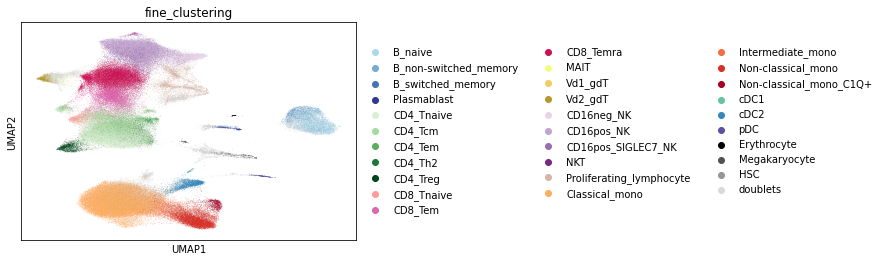

In [9]:
sc.pl.umap(rna, color = 'fine_clustering', palette = {'B_naive':'#abd9e9',
'B_non-switched_memory':'#74add1',
'B_switched_memory':'#4575b4',
'Plasmablast':'#313695',
'CD4_Tnaive':'#d9f0d3',
'CD4_Tcm':'#a6dba0',
'CD4_Tem':'#5aae61',
'CD4_Th2':'#1b7837',
'CD4_Treg':'#00441b',
'CD8_Tnaive':'#ff9d9a',
'CD8_Tem':'#df65b0',
'CD8_Temra':'#ce1256',
'MAIT':'#f0ff7e',
'Vd1_gdT':'#f1ce63',
'Vd2_gdT':'#b6992d',
'CD16neg_NK':'#e7d4e8',
'CD16pos_NK':'#c2a5cf',
'CD16pos_SIGLEC7_NK':'#9970ab',
'NKT':'#762a83',
'Proliferating_lymphocyte':'#d7b5a6',
'Classical_mono':'#fdae61',
'Intermediate_mono':'#f46d43',
'Non-classical_mono':'#d73027',
'Non-classical_mono_C1Q+':'#a50026',
'cDC1':'#66c2a5',
'cDC2':'#3288bd',
'pDC':'#5e4fa2',
'Erythrocyte':'#000000',
'Megakaryocyte':'#525252',
'HSC':'#969696',
'doublets':'#d9d9d9'})

In [10]:
adata.obs = rna.obs.copy()
adata2.obs = rna.obs.copy()
adata3.obs = rna.obs.copy()

adata.uns = rna.uns.copy()
adata2.uns = rna.uns.copy()
adata3.uns = rna.uns.copy()

In [11]:
# save first
rna.write('h5ad/adata_soupx_trans_cite_rna.h5ad', compression = 'gzip')
adata.write('h5ad/adata_soupx_trans_cite_raw.h5ad', compression = 'gzip')
adata2.write('h5ad/adata_soupx_trans_raw.h5ad', compression = 'gzip')
adata3.write('h5ad/adata_soupx_trans_cite_bgshift_raw.h5ad', compression = 'gzip')

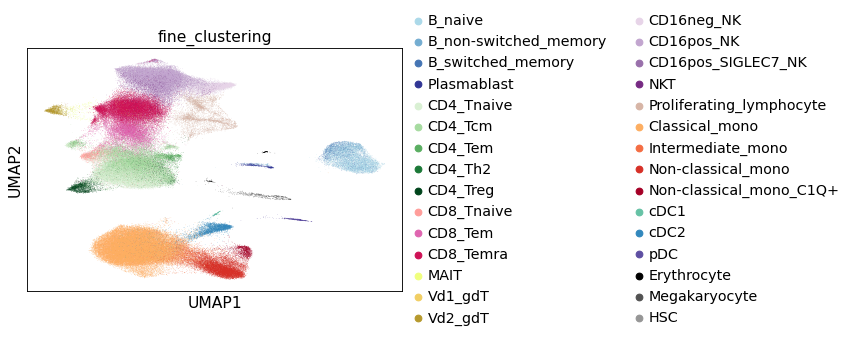

In [12]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sc.set_figure_params(figsize = (6,4), dpi_save = 900, vector_friendly=True)
sc.pl.umap(rna[~(rna.obs['fine_clustering'] == 'doublets')], color = 'fine_clustering', save = '_fine_clustering.pdf')

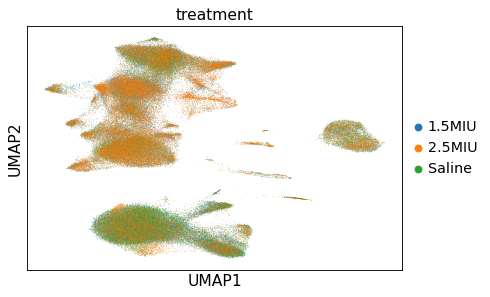

In [16]:
sc.pl.umap(rna[~(rna.obs['fine_clustering'] == 'doublets')], color = 'treatment', save = '_treatment.pdf')

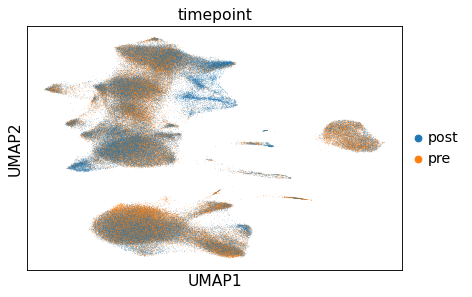

In [17]:
sc.pl.umap(rna[~(rna.obs['fine_clustering'] == 'doublets')], color = 'timepoint', save = '_timepoint.pdf')

In [13]:
# import numpy as np
# import pandas as pd
# import scanpy as sc
# import scrublet as scr
# import os
# import warnings
# import functools
# import seaborn as sns
# import scipy.stats
# import anndata
# import dandelion as ddl
# sc.logging.print_header()

# warnings.filterwarnings('ignore')
# os.chdir('/lustre/scratch117/cellgen/team297/kt16/Ziad/scanpy')

# rna = sc.read_h5ad('h5ad/adata_soupx_trans_cite_rna.h5ad')
rnax = rna[~(rna.obs['fine_clustering'] == 'doublets')].copy()

In [14]:
rnax.obs.drop('CD4', axis = 1, inplace = True)

In [44]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
dp = sc.pl.DotPlot(rnax, 
              ['CD19', 'MS4A1', 'CD27', 
               'IGHM', 'IGHA1', 'IGHG1', 
               'CD38', 'MZB1', 'JCHAIN',               
               'CD4', 'CD3D', 'TRBC2',
               'CCR7', 'SELL', 'CD44', 
               'CRLF2', 'IL5', 'IL13', 
               'FOXP3', 'CTLA4', 'IL2RA',
               'CD8A', 'CD8B', 'GZMB',
               'TRAV1-2', 'TRDV1', 'TRDV2',
               'GNLY', 'XCL1', 'FCGR3A', 'SIGLEC7',
               'MKI67',
               'CD14', 'CEBPB', 'FCN1',
               'C1QA', 'C1QB', 'C1QC', 
               'CLEC9A', 'XCR1', 'HLA-DRA',
               'CLEC10A', 'CD1C', 'SIRPA',
               'TCF4', 'IRF7', 'IRF8', 
               'HBA1', 'HBB', 'HBD',
               'PPBP', 'PF4', 'ITGA2B',
               'CD34', 'SPINK2', 'SOX4'], 
              groupby = 'fine_clustering', 
              cmap = 'viridis', 
              standard_scale = 'var',
              figsize = (15,8.5))

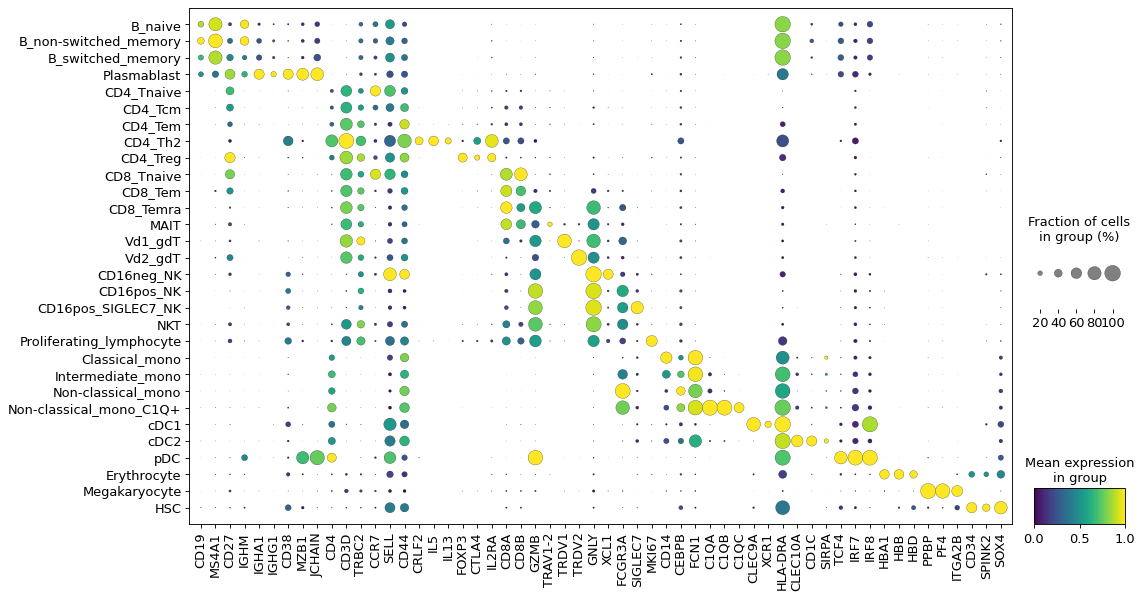

In [45]:
dp.savefig('figures/dotplot_markers.pdf')